# PandasChapter_03

In [1]:
import requests
from ipywidgets import Image


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('D:\\myPythonProjects\\PandaSummarisingAggregatingGrouping\\phone_bill_NewCleanData.csv')

In [4]:
NumOfRows = len(list(data.index))
NumOfRows

825

In [5]:
NumOfCols = len(list(data.columns))
NumOfCols

7

In [6]:
pd.set_option('display.max_rows', NumOfRows)
pd.set_option('display.max_columns', NumOfCols)

In [7]:
data

,date,duration,item,month,network,network_type,old_dropped_index
0,15/10/14 06:58,34.429,data,2014-11,data,data,0
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,1
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,2
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,3
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,4
5,15/10/14 18:55,4.000,call,2014-11,Tesco,mobile,5
6,16/10/14 06:58,34.429,data,2014-11,data,data,6
7,16/10/14 15:01,602.000,call,2014-11,Three,mobile,7
8,16/10/14 15:12,1050.000,call,2014-11,Three,mobile,8
9,16/10/14 15:30,19.000,call,2014-11,voicemail,voicemail,9


__Always Remember these rules:__

__loc:__ gets rows (or columns) with particular labels from the index.

__iloc:__ gets rows (or columns) at particular positions in the index (so it only takes integers).

__ix:__ usually tries to behave like __loc__ but falls back to behaving like __iloc__ if a label is not present in the index.

__It's important to note some subtleties that can make ix slightly tricky to use:__

if the index is of integer type, ix will only use label-based indexing and not fall back to position-based indexing. If the label is not in the index, an error is raised.

if the index does not contain only integers, then given an integer, ix will immediately use position-based indexing rather than label-based indexing. If however ix is given another type (e.g. a string), it can use label-based indexing.

__To illustrate the differences between the three methods, consider the following Series:__

In [8]:
my_series = pd.Series(np.nan, index=[49,48,47,46,45, 1, 2, 3, 4, 5])
my_series

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
dtype: float64

In [9]:
# returns us the first 3 rows (since it treats 3 as a position
my_series.iloc[:3] 

49   NaN
48   NaN
47   NaN
dtype: float64

In [10]:
# slice up to and including label 3
my_series.loc[:3] 

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

In [11]:
# the integer is in the index so s.ix[:3] works like loc
my_series.ix[:3] 

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

Notice s.ix[:3] returns the same Series as s.loc[:3] since it looks for the label first rather than working on the position (and the index for s is of integer type).

In [12]:
my_series.iloc[:6]

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
dtype: float64

In [13]:
# Aboves.iloc[:6] returns the first 6 rows of the Series as expected. 
# However, s.loc[:6] raises a KeyError since 6 is not in the index.
# my_series.loc[:6]

In [14]:
# .ix gives error because it tried to behave like loc and search for index containing text 6 , but it find nothing
# then .ix did not tried to behave like .iloc Because our index is of integer type ix doesn't fall back to behaving like iloc.
my_series.ix[:6]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 6

If, however, our index was of mixed type, given an integer ix would behave like iloc immediately instead of raising a KeyError:


In [15]:
s2 = pd.Series(np.nan, index=['a','b','c','d','e', 1, 2, 3, 4, 5])
s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [16]:
s2.index.is_mixed() # index is mix of different types

False

In [17]:
s2.ix[:6] # now behaves like iloc given integer

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
1   NaN
dtype: float64

In [18]:
s2.ix[:'c'] # behaves like loc given non-integer

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a   NaN
b   NaN
c   NaN
dtype: float64

Keep in mind that ix can still accept non-integers and behave like loc:

In [19]:
 s2.ix[:'c'] # behaves like loc given non-integer

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a   NaN
b   NaN
c   NaN
dtype: float64

In [20]:
data.loc[6]

date                 16/10/14 06:58
duration                     34.429
item                           data
month                       2014-11
network                        data
network_type                   data
old_dropped_index                 6
Name: 6, dtype: object

In [21]:
data.iloc[6]

date                 16/10/14 06:58
duration                     34.429
item                           data
month                       2014-11
network                        data
network_type                   data
old_dropped_index                 6
Name: 6, dtype: object

In [22]:
data.iloc[[6, 8, 19]]

,date,duration,item,month,network,network_type,old_dropped_index
6,16/10/14 06:58,34.429,data,2014-11,data,data,6
8,16/10/14 15:12,1050.000,call,2014-11,Three,mobile,8
19,17/10/14 17:29,4.000,call,2014-11,Vodafone,mobile,20


In [23]:
data.loc[[6, 8, 19]]

,date,duration,item,month,network,network_type,old_dropped_index
6,16/10/14 06:58,34.429,data,2014-11,data,data,6
8,16/10/14 15:12,1050.000,call,2014-11,Three,mobile,8
19,17/10/14 17:29,4.000,call,2014-11,Vodafone,mobile,20


In [24]:
# data.iloc[[6, 8, 19], ['date','item']]  # this wont work as i used column name not index of column
data.loc[[6, 8, 19], ['date','item']]

,date,item
6,16/10/14 06:58,data
8,16/10/14 15:12,call
19,17/10/14 17:29,call


In [25]:
data.iloc[[6, 8, 19], [0, 3]]

,date,month
6,16/10/14 06:58,2014-11
8,16/10/14 15:12,2014-11
19,17/10/14 17:29,2014-11


In [26]:
# because -1 is not location so will not work with loc  , thoutg it is index so work with iloc 
# data.loc[-1] 

data.iloc[-1]

date                 14/03/15 00:16
duration                       24.5
item                            sms
month                       2015-03
network                       world
network_type                  world
old_dropped_index               829
Name: 824, dtype: object

In [27]:
data.loc[5:30:3]

,date,duration,item,month,network,network_type,old_dropped_index
5,15/10/14 18:55,4.0,call,2014-11,Tesco,mobile,5
8,16/10/14 15:12,1050.0,call,2014-11,Three,mobile,8
11,16/10/14 22:18,1.0,sms,2014-11,Meteor,mobile,11
14,17/10/14 11:19,1.0,sms,2014-11,Tesco,mobile,15
17,17/10/14 17:23,1.0,sms,2014-11,Vodafone,mobile,18
20,17/10/14 17:30,375.0,call,2014-11,Tesco,mobile,21
23,17/10/14 17:44,1.0,sms,2014-11,Vodafone,mobile,24
26,18/10/14 11:51,783.0,call,2014-11,Tesco,mobile,27
29,18/10/14 13:08,101.0,call,2014-11,Vodafone,mobile,30


In [28]:
data.iloc[5:30:3]

,date,duration,item,month,network,network_type,old_dropped_index
5,15/10/14 18:55,4.0,call,2014-11,Tesco,mobile,5
8,16/10/14 15:12,1050.0,call,2014-11,Three,mobile,8
11,16/10/14 22:18,1.0,sms,2014-11,Meteor,mobile,11
14,17/10/14 11:19,1.0,sms,2014-11,Tesco,mobile,15
17,17/10/14 17:23,1.0,sms,2014-11,Vodafone,mobile,18
20,17/10/14 17:30,375.0,call,2014-11,Tesco,mobile,21
23,17/10/14 17:44,1.0,sms,2014-11,Vodafone,mobile,24
26,18/10/14 11:51,783.0,call,2014-11,Tesco,mobile,27
29,18/10/14 13:08,101.0,call,2014-11,Vodafone,mobile,30


In [29]:
data.iloc[-14: :2]   # print last 4 records

,date,duration,item,month,network,network_type,old_dropped_index
811,04/03/15 12:29,10528.000,call,2015-03,landline,landline,816
813,06/03/15 06:58,34.429,data,2015-03,data,data,818
815,08/03/15 06:58,34.429,data,2015-03,data,data,820
817,10/03/15 06:58,34.429,data,2015-03,data,data,822
819,12/03/15 06:58,34.429,data,2015-03,data,data,824
821,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile,826
823,14/03/15 00:13,1.000,sms,2015-03,world,world,828


In [30]:
data.iloc[2:4] # print 2 and 3 . Remember 4 is not included

,date,duration,item,month,network,network_type,old_dropped_index
2,15/10/14 14:46,23.0,call,2014-11,Meteor,mobile,2
3,15/10/14 14:48,4.0,call,2014-11,Tesco,mobile,3


In [31]:
data.iloc[:-14:-2] # reverse order

,date,duration,item,month,network,network_type,old_dropped_index
824,14/03/15 00:16,24.500,sms,2015-03,world,world,829
822,13/03/15 06:58,34.429,data,2015-03,data,data,827
820,13/03/15 00:38,1.000,sms,2015-03,world,world,825
818,11/03/15 06:58,34.429,data,2015-03,data,data,823
816,09/03/15 06:58,34.429,data,2015-03,data,data,821
814,07/03/15 06:58,34.429,data,2015-03,data,data,819
812,05/03/15 06:58,34.429,data,2015-03,data,data,817


Pandas recommends that for fast access of scalar values, you can use at() and iat(

In [32]:
y = pd.DataFrame(
    {
        'one': pd.Series(random.sample(range(100), 5), index=list('abcde')),
        'two': pd.Series(random.sample(range(100), 5), index=list('abcde')),
        'three': pd.Series(list('ABCDE'), index=list('abcde'))
    }
)

In [33]:
y

,one,two,three
a,7,8,A
b,17,55,B
c,63,30,C
d,12,70,D
e,88,82,E


In [34]:
# When using iat(), both arguments need to be integer positions of the row and column respectively.
y.iat[2, 1]

30

In [35]:
# Both Series and DataFrame support a method take() which accepts a list of indices and returns rows at those indices.
y.take([0, 3, 4], axis=0)


,one,two,three
a,7,8,A
d,12,70,D
e,88,82,E


In [36]:
# You can also take() some columns by specifying the column indices along with the argument axis=1 to indicate a 
# column-wise operation.

y.take([0, 2], axis=1)

,one,three
a,7,A
b,17,B
c,63,C
d,12,D
e,88,E


In [37]:
data = pd.read_csv('D:\\myPythonProjects\\PandaSummarisingAggregatingGrouping\\phone_bill_NewCleanData.csv')

In [38]:
data.head()

,date,duration,item,month,network,network_type,old_dropped_index
0,15/10/14 06:58,34.429,data,2014-11,data,data,0
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,1
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,2
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,3
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,4


In [39]:
MedianOfDuration = data['duration'].median()
MedianOfDuration

25.0

In [40]:
new_data = data[data['duration'] > MedianOfDuration].replace([0, 10, 31], 9999) 

In [41]:
new_data.head()

,date,duration,item,month,network,network_type,old_dropped_index
0,15/10/14 06:58,34.429,data,2014-11,data,data,9999
6,16/10/14 06:58,34.429,data,2014-11,data,data,6
7,16/10/14 15:01,602.000,call,2014-11,Three,mobile,7
8,16/10/14 15:12,1050.000,call,2014-11,Three,mobile,8
10,16/10/14 16:21,1183.000,call,2014-11,Three,mobile,9999


In [42]:
data['item'].describe()

count      825
unique       3
top       call
freq       386
Name: item, dtype: object

In [43]:
data.groupby('month')['item'].describe()

,count,unique,top,freq
month,,,,
2014-11,229,3,call,107
2014-12,153,3,call,77
2015-01,205,3,call,88
2015-02,137,3,call,67
2015-03,101,3,call,47


In [44]:
# this line of code divide my data into month and then tell me how many entries i have per month for each column. 
# Manually i put filter on top of excel and now selecting every month one by one and checking how many rows of data i have.

data.groupby('month').count()

,date,duration,item,network,network_type,old_dropped_index
month,,,,,,
2014-11,229,229,229,229,229,229
2014-12,153,153,153,153,153,153
2015-01,205,205,205,205,205,205
2015-02,137,137,137,137,137,137
2015-03,101,101,101,101,101,101


In [45]:
# Note : Data for Analytics of Matrimonial Cases.

# Lets say i have some data which have married and unmarried makes and females
# So i can say something like:
    
# data.groupby(['sex']['maritalstatus']).count()

# this will tell me some thing like 
# Male - > Married - > 20
# Male - > Single  - > 30
# Male  -> divorced -> 10
# Female- > Married - > 20
# Female- > Single  - > 34
# Female -> divorced -> 90 

# Now assume there income is stored in column income and i want to know who is earning most then married or unmarried or 
# divorced and also i wanna know about there age.

# data.groupby(['sex']['maritalstatus'])['income'].max()
# data.groupby(['sex']['maritalstatus'])['income'].min()
print(" ")

In [46]:
# this line of code divide the data into monthly groups and then tell me how many unique entries are there in item in each 
# months
data.groupby('month')['item'].nunique()

month
2014-11    3
2014-12    3
2015-01    3
2015-02    3
2015-03    3
Name: item, dtype: int64

In [47]:
# this line of code divide my data  into months and item and then show me the minimum value of duration from that groups.
data.groupby(['month','item'])['duration'].min()

month    item
2014-11  call     1.000
         data    34.429
         sms      1.000
2014-12  call     2.000
         data    34.429
         sms      1.000
2015-01  call     2.000
         data    34.429
         sms      1.000
2015-02  call     1.000
         data    34.429
         sms      1.000
2015-03  call     2.000
         data    34.429
         sms      1.000
Name: duration, dtype: float64

In [48]:
# this would have made more sense if i would have a cost colm in my group showing cost of that entry/row(instead of date)
#then i woukd have figured out which month say 2015-01 i have spend max money in sms(not on internet data and calling).
data.groupby(['month','item']) [['duration' , 'date']].max()

duration            date
month   item                           
2014-11 call   1940.000  31/10/14 18:39
        data     34.429  31/10/14 06:58
        sms       1.000  31/10/14 18:29
2014-12 call   2120.000  30/11/14 14:51
        data     34.429  30/11/14 06:58
        sms       1.000  30/11/14 14:44
2015-01 call   1859.000  31/12/14 13:49
        data     34.429  31/12/14 06:58
        sms       1.000  31/12/14 23:37
2015-02 call   1863.000  31/01/15 13:14
        data     34.429  31/01/15 06:58
        sms       1.000  29/01/15 17:19
2015-03 call  10528.000  28/02/15 21:25
        data     34.429  28/02/15 06:58
        sms      24.500  28/02/15 22:39

In [49]:
# this line of code divide my data into month and then item and then tells me how many sms i send , calls i made , internet
# data i have used in that month.
data.groupby(['month', 'item'])['item'].count()

month    item
2014-11  call    107
         data     28
         sms      94
2014-12  call     77
         data     29
         sms      47
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: item, dtype: int64

<class 'pandas.core.series.Series'>
month
2014-11    229
2014-12    153
2015-01    205
2015-02    137
2015-03    101
Name: item, dtype: int64
<class 'pandas.core.frame.DataFrame'>


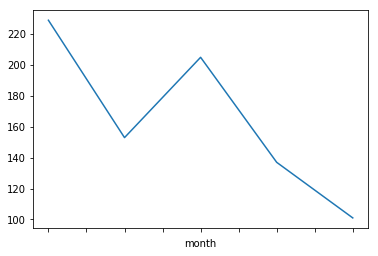

In [50]:
my_data_count_series = data.groupby(['month'])['item'].count()

% matplotlib inline
my_data_count_series.plot()

print(type(my_data_count_series))
print(my_data_count_series)

# series.reset_index() will not modify series , It will remain series object . If you need a data frame then you
# need to create a new dataframe like this .

my_data_count_df = my_data_count_series.reset_index()
print(type(my_data_count_df))

In [52]:
# df .to_fether()  - > to create binary file which can be imported to R
# df.to_sql() ----> tp store data to sql
# odo ---> is library file use for data converted like you  have big 3GB excel file , you can not read it into excel.
# then you can use odo to convert it to json or mysql or something else.

In [53]:
data_frame_1 = pd.read_csv('D:\myPythonProjects\PandasBasics\concat_1.csv')
data_frame_2 = pd.read_csv('D:\myPythonProjects\PandasBasics\concat_2.csv')
data_frame_3 = pd.read_csv('D:\myPythonProjects\PandasBasics\concat_3.csv')

In [54]:
data_frame_1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [55]:
data_frame_2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [56]:
data_frame_3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [57]:
concat_data_frame_row_wise = pd.concat([data_frame_1, data_frame_1, data_frame_1])

In [58]:
concat_data_frame_row_wise

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [59]:
concat_data_frame_row_wise.loc[0]

,A,B,C,D
0,a0,b0,c0,d0
0,a0,b0,c0,d0
0,a0,b0,c0,d0


In [60]:
concat_data_frame_row_wise.iloc[0]

A    a0
B    b0
C    c0
D    d0
Name: 0, dtype: object

In [61]:
concat_data_frame_row_wise.loc[0, 'A':'C']

,A,B,C
0,a0,b0,c0
0,a0,b0,c0
0,a0,b0,c0


In [62]:
concat_data_frame_row_wise.iloc[1:4:2, :2]

,A,B
1,a1,b1
3,a3,b3


In [63]:
concat_data_frame_row_wise.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a0,b0,c0,d0
5,1,a1,b1,c1,d1
6,2,a2,b2,c2,d2
7,3,a3,b3,c3,d3
8,0,a0,b0,c0,d0
9,1,a1,b1,c1,d1


In [64]:
existing_column_names_list = ['A','B','C','D']
new_column_names_list = ['this_A','this_B','this_C','this_D']
myDict = dict(zip(existing_column_names_list,new_column_names_list))
myDict

{'A': 'this_A', 'B': 'this_B', 'C': 'this_C', 'D': 'this_D'}

In [65]:
concat_data_frame_row_wise.rename(columns=myDict, inplace=True)

In [66]:
concat_data_frame_row_wise

,this_A,this_B,this_C,this_D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [67]:
concat_data_frame_column_wise = pd.concat([data_frame_1, data_frame_1, data_frame_1] , ignore_index=True, axis=1)

In [68]:
numOfCol=len(list(concat_data_frame_column_wise.columns))
pd.set_option('max_columns', numOfCol)
concat_data_frame_column_wise

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a0,b0,c0,d0,a0,b0,c0,d0
1,a1,b1,c1,d1,a1,b1,c1,d1,a1,b1,c1,d1
2,a2,b2,c2,d2,a2,b2,c2,d2,a2,b2,c2,d2
3,a3,b3,c3,d3,a3,b3,c3,d3,a3,b3,c3,d3


In [69]:
new_row_series = pd.Series(['n1', 'n2', 'n3', 'n4'])
new_row_series

0    n1
1    n2
2    n3
3    n4
dtype: object

In [70]:
# this is incorrect way of concatinating 
pd.concat([concat_data_frame_row_wise, new_row_series])

,this_A,this_B,this_C,this_D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN


In [71]:
# Right way of appending seies 
existing_column = list(concat_data_frame_row_wise.columns)
existing_column



['this_A', 'this_B', 'this_C', 'this_D']

In [72]:
#   Please note the double bracket outsite the  Series object new_row_series.
list_of_n = ['n1', 'n2', 'n3', 'n4']
list_of_n

['n1', 'n2', 'n3', 'n4']

In [73]:
# notice list list_of_n is enclosed in sqare bracket.
new_row_dataframe = pd.DataFrame([list_of_n], columns=existing_column)
new_row_dataframe

,this_A,this_B,this_C,this_D
0,n1,n2,n3,n4


In [74]:
pd.concat([concat_data_frame_row_wise , new_row_dataframe])

,this_A,this_B,this_C,this_D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a0,b0,c0,d0
1,a1,b1,c1,d1


# Join (Concatenation) and Mergeing of DataFrames.

In [75]:
Image(value=requests.get('https://github.com/amitsuneja/PandaBasics/blob/master/Chapter03_join-types-merge-names.jpg?raw=true').content,width=500,height=500)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x02\x0…

In [76]:
city_temp = pd.DataFrame(
    {
    "city": ["new york","chicago","orlando", "Delhi"],
    "temperature": [21,14,35,43],
    })
city_temp

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,Delhi,43


In [77]:

city_humid = pd.DataFrame(
    {
    "city": ["chicago","new york","orlando", "Chandigarh"],
    "humidity": [65,68,75, 99],
     })
city_humid

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75
3,Chandigarh,99


In [78]:
# An inner join  (INTERSECTION)
# is the simplest join, this will only retain rows in which both tables share a key value.
# You can notice below that Delhi and Chandigarh , Did not show up as they are not present in both


pd.merge(city_temp, city_humid, on="city", how="inner", indicator='True')   # inner is default ,if you dont specify iit , its ok.

,city,temperature,humidity,True
0,new york,21,68,both
1,chicago,14,65,both
2,orlando,35,75,both


In [79]:
# Outer Join (UNION)

pd.merge(city_temp, city_humid, on="city", how="outer", indicator='True')

,city,temperature,humidity,True
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,75.0,both
3,Delhi,43.0,NaN,left_only
4,Chandigarh,NaN,99.0,right_only


In [80]:
# Left Join
# Take all elements of intersection and complete left

pd.merge(city_temp, city_humid, on="city", how="left", indicator='True')

,city,temperature,humidity,True
0,new york,21,68.0,both
1,chicago,14,65.0,both
2,orlando,35,75.0,both
3,Delhi,43,NaN,left_only


In [81]:
# Right Join
# Take all elements of intersection and complete Right

pd.merge(city_temp, city_humid, on="city", how="right", indicator='True')

,city,temperature,humidity,True
0,new york,21.0,68,both
1,chicago,14.0,65,both
2,orlando,35.0,75,both
3,Chandigarh,NaN,99,right_only


In [82]:
# Merging when duplicate column names

df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [83]:

df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [84]:
df3= pd.merge(df1,df2,on="city",how="outer")
df3

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [85]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [86]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_left','_right'))
df3

,city,temperature_left,humidity_left,temperature_right,humidity_right
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [87]:
# Merge based on indexes

pd.merge(df1, df2, right_index=True, left_index=True, suffixes=('_left','_right'))

,city_left,temperature_left,humidity_left,city_right,temperature_right,humidity_right
0,new york,21,65,chicago,21,65
1,chicago,14,68,new york,14,68
2,orlando,35,71,san diego,35,71


In [88]:
# Revision

In [89]:
city_temp = pd.DataFrame(
    {
    "city": ["new york", "new york","chicago","orlando", "Delhi", "Delhi"],
    "temperature": [22,21,14,35,43,45],
    })
city_temp

,city,temperature
0,new york,22
1,new york,21
2,chicago,14
3,orlando,35
4,Delhi,43
5,Delhi,45


In [90]:
city_humid = pd.DataFrame(
    {
    "city": ["chicago","new york","orlando", "Chandigarh"],
    "humidity": [65,68,75, 99],
     })
city_humid

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75
3,Chandigarh,99


In [91]:
pd.merge(city_temp, city_humid, on="city", how="inner", indicator='True')

,city,temperature,humidity,True
0,new york,22,68,both
1,new york,21,68,both
2,chicago,14,65,both
3,orlando,35,75,both


In [92]:
result_1 = pd.merge(city_temp, city_humid, on="city", how="outer", indicator='True')
result_1

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [93]:
result = pd.merge(city_temp, city_humid, left_index=False, right_index=False, how='inner')
result

,city,temperature,humidity
0,new york,22,68
1,new york,21,68
2,chicago,14,65
3,orlando,35,75


In [94]:
# Note 
# np.nan is always null
###################################################################################
# np.nan , np.NAN , np.NaN all are equal , but it is neither True and neither False.

In [95]:
np.NaN == np.nan

False

In [96]:
# they are not equal to each other

np.NaN == np.NAN

False

In [97]:
np.NaN == True

False

In [98]:
np.NaN == False

False

In [99]:
# Hence Nan is null value
pd.isnull(np.NaN )

True

In [100]:
pd.isnull(46)

False

In [101]:
# Blanks space is not null
pd.isnull(' ')

False

In [102]:
result_1

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [103]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 4 columns):
city           7 non-null object
temperature    6 non-null float64
humidity       5 non-null float64
True           7 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 335.0+ bytes


In [104]:
# by default value_counts() drops the NaN and dont tell its value

result_1['humidity'].value_counts()

68.0    2
99.0    1
75.0    1
65.0    1
Name: humidity, dtype: int64

In [105]:
# lucilky NA is 2 hightst coming in top

result_1['humidity'].value_counts(dropna=False)

NaN      2
 68.0    2
 99.0    1
 75.0    1
 65.0    1
Name: humidity, dtype: int64

In [106]:
# i have 4 unique values 

result_1['humidity'].nunique()

4

In [107]:
result_1


,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [108]:
result_1.dtypes

city             object
temperature     float64
humidity        float64
True           category
dtype: object

In [109]:
result_1.ftypes

city             object:dense
temperature     float64:dense
humidity        float64:dense
True           category:dense
dtype: object

In [110]:
result_1['humidity'].fillna(0)
result_1

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [111]:
# result_1['temperature'].fillna(0, inplace=True)
result_1['temperature'].fillna(0)
result_1

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [112]:
result_1.fillna(method='ffill')

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,75.0,left_only
5,Delhi,45.0,75.0,left_only
6,Chandigarh,45.0,99.0,right_only


In [113]:
result_1

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [114]:
result_1.fillna(method='bfill')

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,99.0,left_only
5,Delhi,45.0,99.0,left_only
6,Chandigarh,NaN,99.0,right_only


In [115]:
result_1.sum()

city           new yorknew yorkchicagoorlandoDelhiDelhiChandi...
temperature                                                  180
humidity                                                     375
True                bothbothbothbothleft_onlyleft_onlyright_only
dtype: object

In [116]:
result_1.sum(skipna=False)

city           new yorknew yorkchicagoorlandoDelhiDelhiChandi...
temperature                                                  NaN
humidity                                                     NaN
True                bothbothbothbothleft_onlyleft_onlyright_only
dtype: object

In [117]:
result_1.T

,0,1,2,3,4,5,6
city,new york,new york,chicago,orlando,Delhi,Delhi,Chandigarh
temperature,22,21,14,35,43,45,NaN
humidity,68,68,65,75,NaN,NaN,99
True,both,both,both,both,left_only,left_only,right_only


In [118]:
result_1

,city,temperature,humidity,True
0,new york,22.0,68.0,both
1,new york,21.0,68.0,both
2,chicago,14.0,65.0,both
3,orlando,35.0,75.0,both
4,Delhi,43.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only


In [119]:
result_1.replace([22.0 , 21.0, 14.0, 35.0, 43.0], value=0)

,city,temperature,humidity,True
0,new york,0.0,68.0,both
1,new york,0.0,68.0,both
2,chicago,0.0,65.0,both
3,orlando,0.0,75.0,both
4,Delhi,0.0,NaN,left_only
5,Delhi,45.0,NaN,left_only
6,Chandigarh,NaN,99.0,right_only
